UNIVERSIDAD MILITAR NUEVA GRANADA

PERCEPTRON MULTICAPA

Jenifer Leiva  
Astrid Melo


In [1]:
# Carga de librerías
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Carga de módulos
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

**Dataset**
MedMNIST dataset
RetinaMNIST

1600 imágenes

Imágenes 28x28 (Tomografía macular de la retina)

Labels: 4

 (train & test por separado)

In [3]:
!pip install medmnist

In [4]:
!pip install keras_tuner

In [5]:
# Carga de módulos
from medmnist import RetinaMNIST

In [6]:
# Cargar train y test
train_dataset = RetinaMNIST(split="train", download=True)
val_dataset   = RetinaMNIST(split="val", download=True)
test_dataset = RetinaMNIST(split="test", download=True)

# Convertir a arrays
x_train = np.array([img for img, _ in train_dataset])
y_train = np.array([label for _, label in train_dataset])

x_val = np.array([img for img, _ in val_dataset])
y_val = np.array([label for _, label in val_dataset])

x_test = np.array([img for img, _ in test_dataset])
y_test = np.array([label for _, label in test_dataset])

In [7]:
#Reshape a un tensor de 4 dimensiones: batch size, width, height, color channels

x_train = x_train.reshape( (x_train.shape[0], 28, 28, 3))

In [8]:
# Normalizar
x_train = x_train.astype('float32') / 255.0

In [9]:
#Labels
y_train

array([[0],
       [0],
       [0],
       ...,
       [2],
       [2],
       [3]])

In [10]:
# Representación one-hot (categorical)
y_train = to_categorical(y_train, num_classes=5)

## Hiperparametros

In [11]:
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras import layers

In [12]:
# Normalize x_test
x_val = x_val.astype('float32') / 255.0

In [13]:
#Reshape x_test to a 4-dimensional tensor: batch size, width, height, color channels
x_val = x_val.reshape( (x_val.shape[0], 28, 28, 3))

In [14]:
y_val = to_categorical(y_val, num_classes=5)

In [15]:
# Definir la función de construcción del modelo
#modelo 1
def build_model(hp):
    model = keras.Sequential()

    # Add a Flatten layer to flatten the input images
    model.add(layers.Flatten(input_shape=(28, 28, 3)))

    # Capa oculta con número de neuronas como hiperparámetro
    model.add(layers.Dense(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        activation='relu'
    ))
    model.add(layers.Dense(5, activation='softmax')) # Changed to 5 classes based on unique labels

    # Definir optimizador y learning rate como hiperparámetros
    optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
    learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])

    if optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    # Compilar el modelo
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Definir el tuner
tuner = kt.Hyperband(
    #construir el modelo d eparametros
    hypermodel=build_model,
    #optimizar valor de accuracy
    objective='val_accuracy',   # Debe ir como string
    #numero de epocas
    max_epochs=30,
    #directorio para guardar resultados hiperparametros
    directory="keras_tuner_dir",
    project_name="keras_tuner_demo"
)

epochs=30;
batch_size=32;


tuner.search(x_train, y_train,
             epochs=epochs,
             validation_data=(x_val, y_val),
            batch_size=batch_size)


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Reloading Tuner from keras_tuner_dir/keras_tuner_demo/tuner0.json


In [16]:
# Definir la función de construcción del modelo
#modelo 2
def build_model2(hp):
    model2 = keras.Sequential()

    # Add a Flatten layer to flatten the input images
    model2.add(layers.Flatten(input_shape=(28, 28, 3)))

    # Capa oculta con número de neuronas como hiperparámetro
    model2.add(layers.Dense(
        units=hp.Int('units', min_value=96, max_value=256, step=32),
        activation='relu'
    ))
    model2.add(layers.Dense(5, activation='softmax')) # Changed to 5 classes based on unique labels

    # Definir optimizador y learning rate como hiperparámetros
    optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
    learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])

    if optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    # Compilar el modelo
    model2.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model2

# Definir el tuner
tuner = kt.Hyperband(
    #construir el modelo d eparametros
    hypermodel=build_model2,
    #optimizar valor de accuracy
    objective='val_accuracy',   # Debe ir como string
    #numero de epocas
    max_epochs=30,
    #directorio para guardar resultados hiperparametros
    directory="keras_tuner_dir",
    project_name="keras_tuner_demo2"
)

epochs=30;
batch_size=42;


tuner.search(x_train, y_train,
             epochs=epochs,
             validation_data=(x_val, y_val),
            batch_size=batch_size)


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Reloading Tuner from keras_tuner_dir/keras_tuner_demo2/tuner0.json


In [17]:
# Definir la función de construcción del modelo
#modelo 3 dropout
def build_model3(hp):
    model3 = keras.Sequential()

    # Add a Flatten layer to flatten the input images
    model3.add(layers.Flatten(input_shape=(28, 28, 3)))

    model3.add(layers.Dropout(0.5))

    # Capa oculta con número de neuronas como hiperparámetro
    model3.add(layers.Dense(
        units=hp.Int('units', min_value=96, max_value=256, step=32),
        activation='relu'
    ))
    model3.add(layers.Dense(5, activation='softmax')) # Changed to 5 classes based on unique labels

    # Definir optimizador y learning rate como hiperparámetros
    optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
    learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])

    if optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    # Compilar el modelo
    model3.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model3

# Definir el tuner
tuner = kt.Hyperband(
    #construir el modelo d eparametros
    hypermodel=build_model3,
    #optimizar valor de accuracy
    objective='val_accuracy',   # Debe ir como string
    #numero de epocas
    max_epochs=30,
    #directorio para guardar resultados hiperparametros
    directory="keras_tuner_dir",
    project_name="keras_tuner_demo3"
)

epochs=30;
batch_size=42;


tuner.search(x_train, y_train,
             epochs=epochs,
             validation_data=(x_val, y_val),
            batch_size=batch_size)


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Reloading Tuner from keras_tuner_dir/keras_tuner_demo3/tuner0.json


In [18]:
# Definir la función de construcción del modelo
#modelo 4 weight decay
weight_decay = 0.001;
def build_model4(hp):
    model4 = keras.Sequential()

    # Add a Flatten layer to flatten the input images
    model4.add(layers.Flatten(input_shape=(28, 28, 3)))
    # Capa oculta con número de neuronas como hiperparámetro
    model4.add(layers.Dense(
        units=hp.Int('units', min_value=96, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(weight_decay)
    ))

    model4.add(layers.Dense(
        units=64,
        activation='sigmoid',
        kernel_regularizer=tf.keras.regularizers.l2(weight_decay)
    ))

    model4.add(layers.Dense(5, activation='softmax')) # Changed to 5 classes based on unique labels

    # Definir optimizador y learning rate como hiperparámetros
    optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
    learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])

    if optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    # Compilar el modelo
    model4.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model4

# Definir el tuner
tuner = kt.Hyperband(
    #construir el modelo d eparametros
    hypermodel=build_model4,
    #optimizar valor de accuracy
    objective='val_accuracy',   # Debe ir como string
    #numero de epocas
    max_epochs=30,
    #directorio para guardar resultados hiperparametros
    directory="keras_tuner_dir",
    project_name="keras_tuner_demo4"
)

epochs=30;
batch_size=42;


tuner.search(x_train, y_train,
             epochs=epochs,
             validation_data=(x_val, y_val),
            batch_size=batch_size)


best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Reloading Tuner from keras_tuner_dir/keras_tuner_demo4/tuner0.json


In [19]:
#Imprimir Hiperparámetros seleccionados

print(best_hps.values)

{'units': 256, 'optimizer': 'adam', 'learning_rate': 0.001, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 1, 'tuner/trial_id': '0066'}


# Entrenamiento

In [20]:
# Construir el modelo con los mejores hiperparámetros
model = build_model4(best_hps)

# Convert y_test to one-hot encoding
y_test = to_categorical(y_test, num_classes=5)

# Entrenar el modelo
history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.4060 - loss: 1.9518 - val_accuracy: 0.4417 - val_loss: 1.6284
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4783 - loss: 1.5720 - val_accuracy: 0.4500 - val_loss: 1.4809
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4792 - loss: 1.5026 - val_accuracy: 0.4417 - val_loss: 1.4003
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4754 - loss: 1.4540 - val_accuracy: 0.4667 - val_loss: 1.3218
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4756 - loss: 1.4279 - val_accuracy: 0.4417 - val_loss: 1.3099
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5068 - loss: 1.3300 - val_accuracy: 0.4417 - val_loss: 1.2790
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5113 - loss: 1.2933 - val_accuracy: 0.4417 - val_loss: 1.2405
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4917 - loss: 1.3057 - val_accuracy: 0.5583 - v

In [21]:
# No. de parámetros en una capa FC:
# No. unidades capa entrada * No. unidades capa salida + No. unidades capa salida (bias)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       602,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,857,425 (7.09 MB)

 Trainable params: 619,141 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,238,284 (4.72 MB)

# Evolución del algoritmo

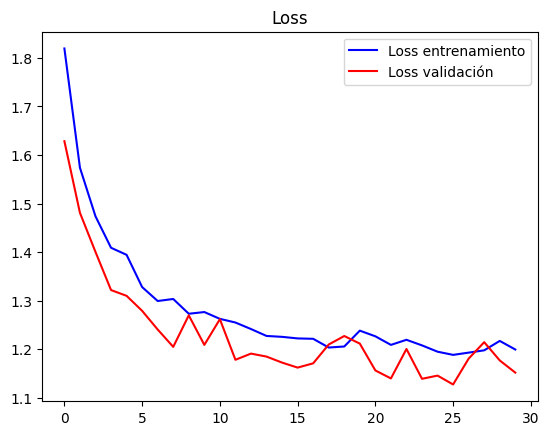

In [22]:
# Gráfica de pérdida
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Loss entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Loss validación')
plt.title('Loss')
plt.legend()
plt.show()

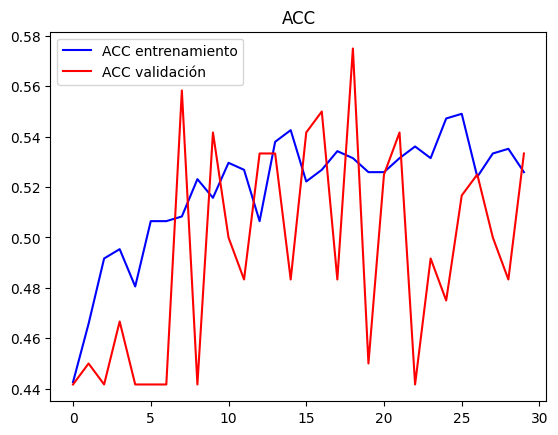

In [23]:
# Gráfica de Accuracy
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] # Changed from 'val_categorical_accuracy'
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='ACC entrenamiento')
plt.plot(epochs, val_acc, 'r', label='ACC validación')
plt.title('ACC')
plt.legend()
plt.show()

# Prueba del modelo

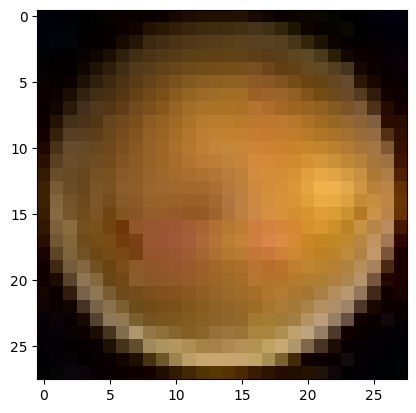

In [24]:
index = random.randint(0, len(x_test) -1)
image = x_test[index]
label = y_test[index]
plt.imshow(image)
plt.show()

In [25]:
label_index = label.argmax()  # índice de la clase
print(f"Etiqueta real: {label_index}")

Etiqueta real: 3


In [26]:
image = (image.reshape((1, 28, 28, 3))).astype('float32') / 255.0

In [27]:
model.predict(image)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([0.1365473 , 0.28778505, 0.23342934, 0.3166142 , 0.0256241 ],
      dtype=float32)

In [28]:
digit = np.argmax(model.predict(image)[0], axis=-1)
print("Prediction: ", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction:  3
